Epoch 1/30, Loss: 14.3887
Epoch 2/30, Loss: 12.4102
Epoch 3/30, Loss: 9.8873
Epoch 4/30, Loss: 6.8079
Epoch 5/30, Loss: 3.9924
Epoch 6/30, Loss: 2.1364
Epoch 7/30, Loss: 1.3812
Epoch 8/30, Loss: 1.2625
Epoch 9/30, Loss: 1.0943
Epoch 10/30, Loss: 1.0726
Epoch 11/30, Loss: 0.9469
Epoch 12/30, Loss: 0.8911
Epoch 13/30, Loss: 0.8630
Epoch 14/30, Loss: 0.7977
Epoch 15/30, Loss: 0.7767
Epoch 16/30, Loss: 0.7355
Epoch 17/30, Loss: 0.7032
Epoch 18/30, Loss: 0.6743
Epoch 19/30, Loss: 0.6424
Epoch 20/30, Loss: 0.6212
Epoch 21/30, Loss: 0.6028
Epoch 22/30, Loss: 0.5884
Epoch 23/30, Loss: 0.5713
Epoch 24/30, Loss: 0.5469
Epoch 25/30, Loss: 0.5442
Epoch 26/30, Loss: 0.4986
Epoch 27/30, Loss: 0.4649
Epoch 28/30, Loss: 0.4610
Epoch 29/30, Loss: 0.4250
Epoch 30/30, Loss: 0.4192


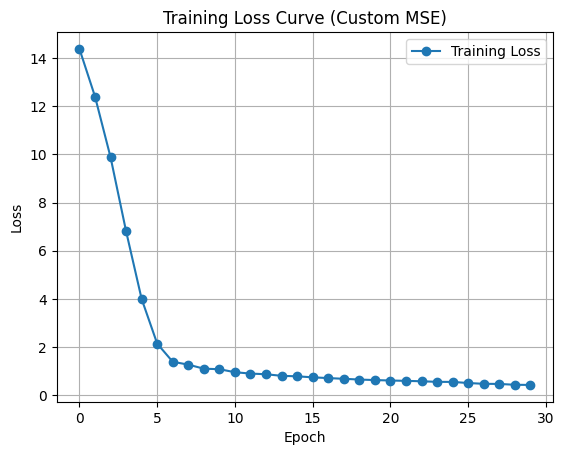

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Step 1: Define a simple dataset
# -------------------------------
X = torch.randn(100, 10)
y = 3 * X[:, 0] + 2 * X[:, 1] + torch.randn(100)  # linear-ish relation
y = y.view(-1, 1)

dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

# -------------------------------
# Step 2: Define the model
# -------------------------------
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# -------------------------------
# Step 3: Define custom loss
# -------------------------------
class CustomMSELoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true)**2)

# -------------------------------
# Step 4: Train the model
# -------------------------------
def train_model():
    net = SimpleNet()
    lossfun = CustomMSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    num_epochs = 30
    losses = []

    for epoch in range(num_epochs):
        batch_losses = []
        for X_batch, y_batch in train_loader:
            y_pred = net(X_batch)
            loss = lossfun(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
        
        mean_loss = np.mean(batch_losses)
        losses.append(mean_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {mean_loss:.4f}")
    
    return net, losses

# -------------------------------
# Step 5: Visualize training loss
# -------------------------------
net, losses = train_model()

plt.plot(losses, 'o-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve (Custom MSE)')
plt.legend()
plt.grid(True)
plt.show()
